In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(f'products_categorization_to_assess.csv')

In [3]:
#compute the global accuracy
accuracy = sklearn.metrics.accuracy_score(y_true = df.true_label,y_pred = df.predicted_label)
accuracy

0.2666

In [4]:
#for each category define precision / recall / f1 score
label = df.true_label.unique()
for i,cat in df.groupby(by = df.true_label):
    precision = sklearn.metrics.precision_score(y_true = cat.true_label,y_pred = cat.predicted_label,average='micro')
    recall = sklearn.metrics.recall_score(y_true = cat.true_label,y_pred = cat.predicted_label,average='micro')
    f1_score = sklearn.metrics.f1_score(y_true = cat.true_label,y_pred = cat.predicted_label,average='micro')
    print("Category:",i)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1 score: {f1_score} \n")

Category: clothing
Precision: 0.36847710330138445
Recall: 0.36847710330138445
f1 score: 0.3684771033013845 

Category: computer and electronics
Precision: 0.18526100307062435
Recall: 0.18526100307062435
f1 score: 0.18526100307062435 

Category: grocery
Precision: 0.22867194371152155
Recall: 0.22867194371152155
f1 score: 0.22867194371152155 

Category: home and kitchen
Precision: 0.1984126984126984
Recall: 0.1984126984126984
f1 score: 0.1984126984126984 



In [5]:
#build a confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(y_true = df.true_label,y_pred = df.predicted_label,labels=label)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=label)

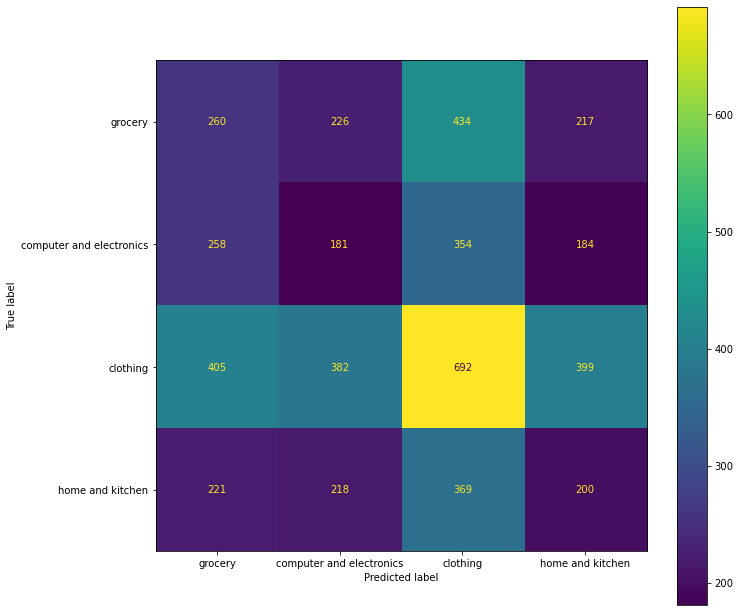

In [8]:
f,ax = plt.subplots(figsize=(11,11))
disp.plot(ax=ax)

#### 4. Do you think the classification system is reliable enough ?
No, the classification system does not seem reliable enough as the precision, recall and f1 score in all the categories is very low. In the entire dataset, the accuracy is ~27% which again, is very low. Based on the confusion matrix, the only category where we see some good predictions are clothing(precision = 37%), but they again, are not as high as they should be